# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [85]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [86]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [87]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [88]:
# Create a Beautiful Soup Object
soup_object = soup(browser.html, 'html.parser')

In [89]:
# Extract all rows of data
mars_temp_table = soup_object.find('table')
mars_temp_data = mars_temp_table.find_all('tr')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [90]:
# Create empty list to store the header column data
headers = []

# Loop through the scraped data to create a list of headers
for header in mars_temp_data[0].find_all('th'):
    headers.append(header.text)


In [91]:
# Create empty list to store the table column data
rows = []
# Loop through the scraped data to create a list of rows
for raw_row in mars_temp_data[1:]:
    data_elements  = raw_row.find_all('td')
    row_data = [td.text for td in data_elements]
    rows.append(row_data)

In [92]:
data_elements  = raw_row.find_all('td')
row_data = []
for td in data_elements:
    value = td.text
    row_data.append(value)

In [93]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_temp_df = pd.DataFrame(rows, columns=headers)


In [94]:
# Confirm DataFrame was created successfully
mars_temp_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [95]:
# Examine data type of each column
mars_temp_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [96]:
# Change data types for data analysis
mars_temp_df['id'] = mars_temp_df['id'].astype(int)
mars_temp_df['terrestrial_date'] = pd.to_datetime(mars_temp_df['terrestrial_date'])
mars_temp_df['sol'] = mars_temp_df['sol'].astype(int)
mars_temp_df['ls'] = mars_temp_df['ls'].astype(int)
mars_temp_df['month'] = mars_temp_df['month'].astype(int)
mars_temp_df['min_temp'] = mars_temp_df['min_temp'].astype(float)
mars_temp_df['pressure'] = mars_temp_df['pressure'].astype(float)

In [97]:
# Confirm type changes were successful by examining data types again
mars_temp_df.dtypes

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [98]:
# 1. How many months are there on Mars?
mars_temp_df['month'].nunique()

12

In [99]:
# 2. How many Martian days' worth of data are there?
mars_temp_df['sol'].nunique()

1867

In [100]:
# 3. What is the average low temperature by month?
average_low_temp = mars_temp_df.groupby('month')['min_temp'].mean()
average_low_temp.map('{:.2f}'.format)

month
1     -77.16
2     -79.93
3     -83.31
4     -82.75
5     -79.31
6     -75.30
7     -72.28
8     -68.38
9     -69.17
10    -71.98
11    -71.99
12    -74.45
Name: min_temp, dtype: object

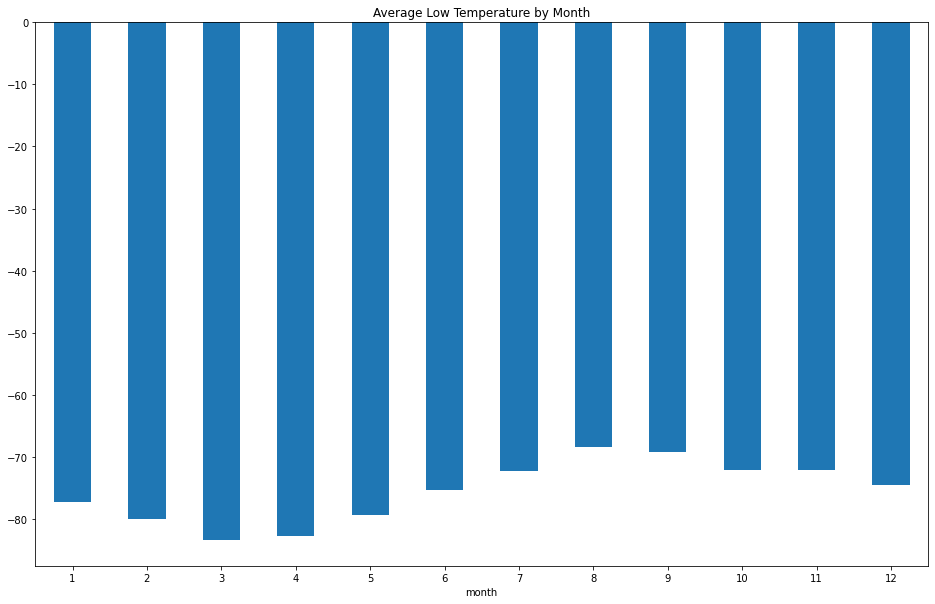

In [101]:
# Plot the average temperature by month
average_low_temp.plot(kind='bar', 
                      title='Average Low Temperature by Month',
                      figsize=(16, 10),
                      rot=0,)

In [102]:
# Identify the coldest and hottest months in Curiosity's location
coldest_month = mars_temp_df.groupby('month')['min_temp'].mean().idxmin()
hottest_month = mars_temp_df.groupby('month')['min_temp'].mean().idxmax()
print(f'On average the coldest month is the {coldest_month}rd and the hottest month is {hottest_month}th.')

On average the coldest month is the 3rd and the hottest month is 8th.


In [103]:
# 4. Average pressure by Martian month
average_pressure = mars_temp_df.groupby('month')['pressure'].mean()
average_pressure.map('{:.2f}'.format)

month
1     862.49
2     889.46
3     877.32
4     806.33
5     748.56
6     745.05
7     795.11
8     873.83
9     913.31
10    887.31
11    857.01
12    842.16
Name: pressure, dtype: object

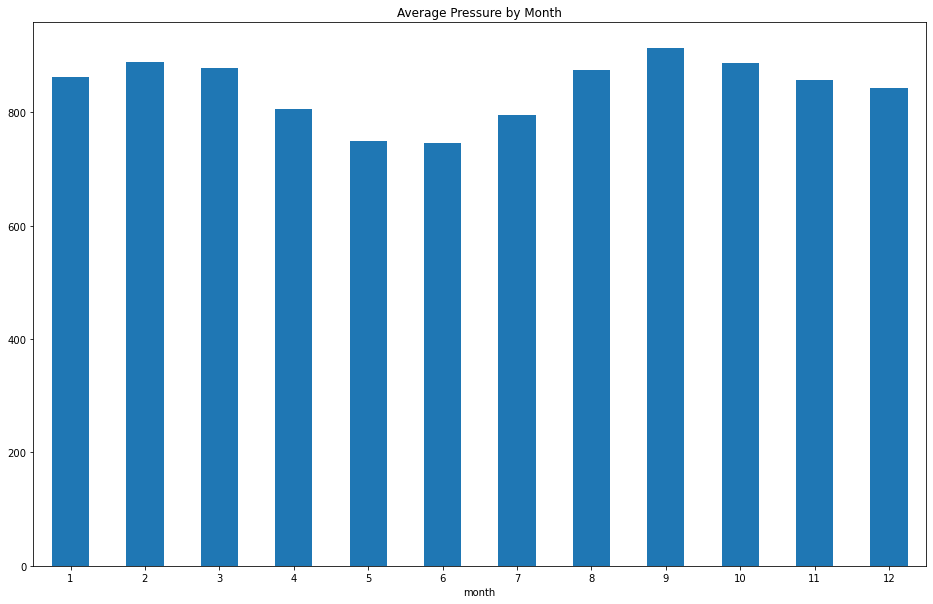

In [104]:
# Plot the average pressure by month
average_pressure.plot(kind='bar', 
                      title='Average Pressure by Month',
                      figsize=(16, 10),
                      rot=0)

In [112]:
# Identify the month with the highest and lowest pressure
highest_pressure = mars_temp_df.groupby('month')['pressure'].mean().idxmax()
lowest_pressure = mars_temp_df.groupby('month')['pressure'].mean().idxmin()
print(f'On average the highest atmospheric pressure is in the {highest_pressure}th month and the lowest atmospheric pressure is in the {lowest_pressure}th month.')

On average the highest atmospheric pressure is in the 9th month and the lowest atmospheric pressure is in the 6th month.


Based on the angle to the sun at Curiosity's location, there are 687.0 terrestrial days in a Martian year.


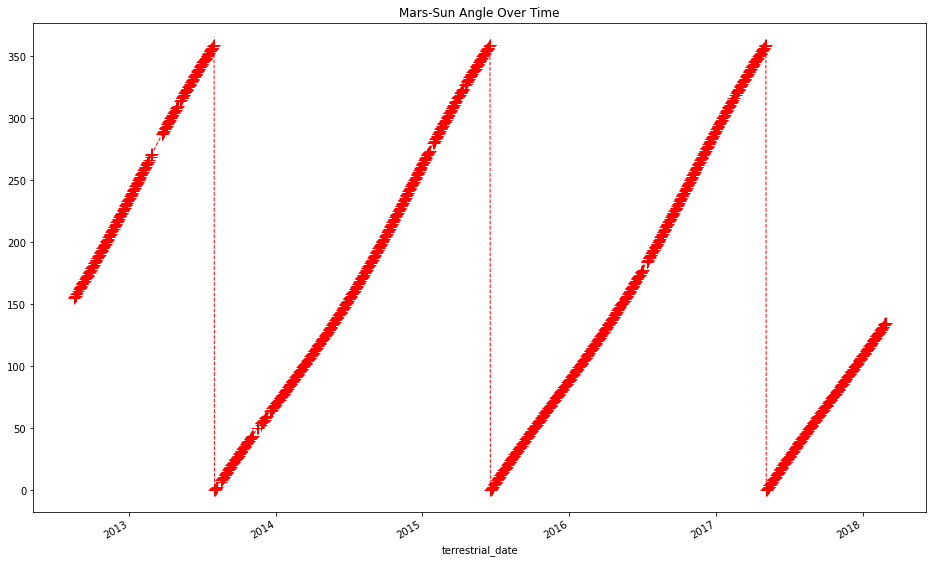

In [105]:
# 5. How many terrestrial (earth) days are there in a Martian year?
# calculate the number of days in a Martian year based on the angle to the sun at curiosity's location
# plot the mars-sun angle over time since Curiosity landed
angle_plot = mars_temp_df.plot(x='terrestrial_date', 
                               y='ls', 
                               title='Mars-Sun Angle Over Time', 
                               legend=False, 
                               figsize=(16, 10), 
                               color='red', 
                               marker='+', 
                               linestyle='dashed', 
                               linewidth=1, 
                               markersize=12)
# find the date with the highest angle in 2013
angle2_2013_df = mars_temp_df[mars_temp_df['terrestrial_date'] >= '2013-01-01']
angle_2013_df = angle2_2013_df[angle2_2013_df['terrestrial_date'] <= '2013-12-31']
date2013 = angle_2013_df[angle_2013_df['ls'] == angle_2013_df['ls'].max()]['terrestrial_date']
# find the date with the highest angle in 2015
angle2_2015_df = mars_temp_df[mars_temp_df['terrestrial_date'] >= '2015-01-01']
angle_2015_df = angle2_2015_df[angle2_2015_df['terrestrial_date'] <= '2015-12-31']
date2015 = angle_2015_df[angle_2015_df['ls'] == angle_2015_df['ls'].max()]['terrestrial_date']
# subtract date with highest angle in 2013 from date with highest angle in 2015
time_elapsed = date2015.values[1] - date2013.values[1]
# convert to days
days = time_elapsed.astype('timedelta64[D]')
days = days / np.timedelta64(1, 'D')
print(f"Based on the angle to the sun at Curiosity's location, there are {days} terrestrial days in a Martian year.")

Based on atmospheric pressure data, there are 689.0 terrestrial days in a Martian year.


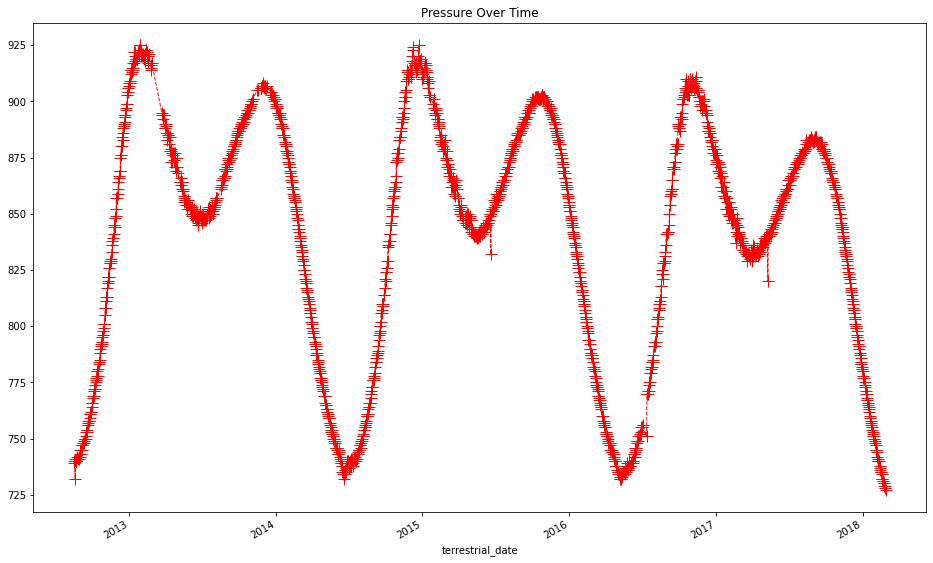

In [107]:
# calculate the number of earth days in a martian year using atmospheric pressure data
# plot the atmospheric pressure over time since Curiosity landed
ap_plot = mars_temp_df.plot(x='terrestrial_date', 
                            y='pressure', 
                            title='Pressure Over Time', 
                            legend=False, 
                            figsize=(16, 10), 
                            color='red', 
                            marker='+', 
                            linestyle='dashed', 
                            linewidth=1, 
                            markersize=12)
# find the row with the highest pressure in 2014
ap_2014_plus_df = mars_temp_df[mars_temp_df['terrestrial_date'] >= '2014-01-01']
ap_2014_df = ap_2014_plus_df[ap_2014_plus_df['terrestrial_date'] < '2015-01-01']
high_2014_ap = ap_2014_df[ap_2014_df['pressure'] == ap_2014_df['pressure'].max()]['terrestrial_date']
# find the row with the highest pressure in 2016
ap_2016_plus_df = mars_temp_df[mars_temp_df['terrestrial_date'] >= '2016-01-01']
ap_2016_df = ap_2016_plus_df[ap_2016_plus_df['terrestrial_date'] < '2017-01-01']
high_2016_ap = ap_2016_df[ap_2016_df['pressure'] == ap_2016_df['pressure'].max()]['terrestrial_date']
# subtract date with highest pressure in 2014 from date with highest pressure in 2016
time_elapsed2 = high_2016_ap.values - high_2014_ap.values
# convert to days
days2 = time_elapsed2.astype('timedelta64[D]')
days2 = days2 / np.timedelta64(1, 'D')
print(f"Based on atmospheric pressure data, there are {days2[0]} terrestrial days in a Martian year.")

Based on temperature data, there are 674.0 terrestrial days in a Martian year.


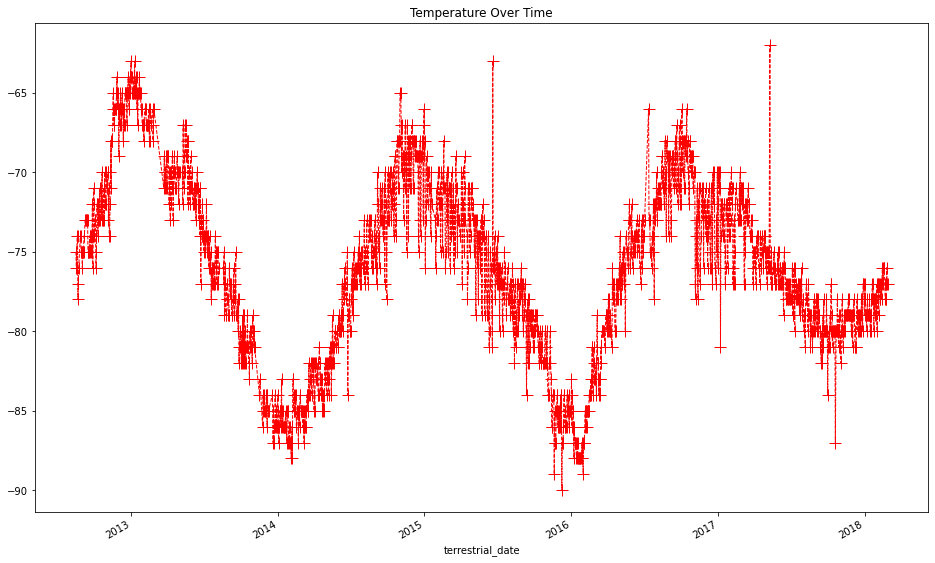

In [108]:
# calculate the number of earth days in a martian year using temperature data
# plot the temperature over time since Curiosity landed
temp_plot = mars_temp_df.plot(x='terrestrial_date',
                              y='min_temp',
                              title='Temperature Over Time',
                              legend=False,
                              figsize=(16, 10),
                              color='red',
                              marker='+',
                              linestyle='dashed',
                              linewidth=1,
                              markersize=12)
# find the row with the lowest temperature in 2014
temp_2014_plus_df = mars_temp_df[mars_temp_df['terrestrial_date'] >= '2014-01-01'] 
temp_2014_df = temp_2014_plus_df[temp_2014_plus_df['terrestrial_date'] < '2015-01-01']
low_2014 = temp_2014_df[temp_2014_df['min_temp'] == temp_2014_df['min_temp'].min()]['terrestrial_date']
# find the row with the lowest temperature in 2015
temp_2015_plus_df = mars_temp_df[mars_temp_df['terrestrial_date'] >= '2015-01-01']
temp_2015_df = temp_2015_plus_df[temp_2015_plus_df['terrestrial_date'] < '2016-01-01']
low_2015 = temp_2015_df[temp_2015_df['min_temp'] == temp_2015_df['min_temp'].min()]['terrestrial_date']
# subtract date with lowest temperature in 2014 from date with lowest temperature in 2015
time_elapsed3 = low_2015.values - low_2014.values
# convert to days
days3 = time_elapsed3.astype('timedelta64[D]')
days3 = days3 / np.timedelta64(1, 'D')
print(f"Based on temperature data, there are {days3[0]} terrestrial days in a Martian year.")                           

Based on the month data provided in the table, there are 671.0 terrestrial days in a Martian year.


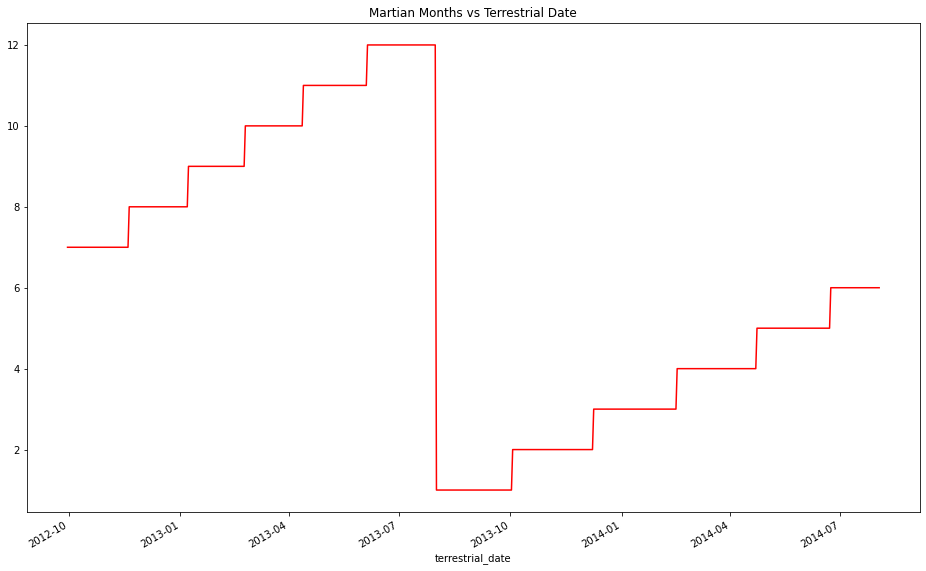

In [109]:
# find the date on earth at the corisponding start of the first full martian month and the end of the last full martian month
# create new dataframe that removes the first partial martian month and starts at month 7
temp_df = mars_temp_df[mars_temp_df.loc[mars_temp_df['month'] == 7].loc[mars_temp_df['terrestrial_date'] < '2014-01-01'].index[0]:]
# remove everything after the first set of 12 full martian months
temp_df = temp_df[:temp_df.loc[temp_df['month'] == 6].loc[temp_df['terrestrial_date'] > '2014-01-01'].index[0]]
# plot the months on mars vs the terrestrial date
month_plot = temp_df.plot(x='terrestrial_date',
                          y='month',
                          title='Martian Months vs Terrestrial Date',
                          legend=False,
                          figsize=(16, 10),
                          color='red')
# find the date on earth at the corisponding start of the first full martian month
start = temp_df[temp_df['month'] == 7]['terrestrial_date'].values[0]
end = temp_df[temp_df['month'] == 6]['terrestrial_date'].values[-1]
# subtract the start date from the end date
time_elapsed4 = end - start
# convert to days
days4 = time_elapsed4.astype('timedelta64[D]')
days4 = days4 / np.timedelta64(1, 'D')
print(f"Based on the month data provided in the table, there are {days4} terrestrial days in a Martian year.")

Upon searching online for the number of days in a Martian year, you’ll find that the answer is 687 Earth days. Though all four methods were within 2.5% of the correct answer, the method that used the angle of the Sun relative to Curiosity's location was the most accurate giving the us exact number.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [113]:
# Write the data to a CSV
mars_temp_df.to_csv('mars_weather.csv', index=False)

In [114]:
browser.quit()